# Analyzing data from about GDP and life expectancy from the World Health Organization and the World Bank.

We have the following nominal categorical variables in the dataset: Country
Likewise, we have the following quantitive variables: GDP, Life expetancy, and Year. We shall inspect these data types further after importing the dataset. Given the variables we will firstly perform univariate analysis to determine the ditribution of Life expectancy, then we will look at a possible association between life expectancy and GDP. Our null hypothesis being that there is no assocation between the two variables. We will look at the covariance using a scatterplot in the seaborn library. Then, we'll look to countries and life expectancy, visualising it through a boxplot. As well as this, we will plot a line graph with life expectancy and year. 

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [169]:
df = pd.read_csv('all_data.csv')
df = df.rename(columns={'Life expectancy at birth (years)': 'life_exp'})
print(df.head(10))
print(df.dtypes)
print(df.columns)

  Country  Year  life_exp           GDP
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10
5   Chile  2005      78.4  1.229650e+11
6   Chile  2006      78.9  1.547880e+11
7   Chile  2007      78.9  1.736060e+11
8   Chile  2008      79.6  1.796380e+11
9   Chile  2009      79.3  1.723890e+11
Country      object
Year          int64
life_exp    float64
GDP         float64
dtype: object
Index(['Country', 'Year', 'life_exp', 'GDP'], dtype='object')


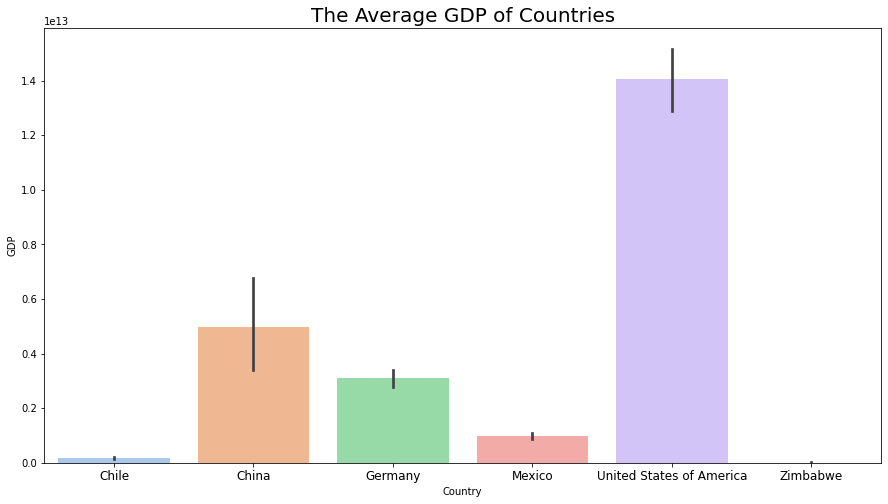

<Figure size 432x288 with 0 Axes>

In [168]:
plt.figure(figsize=(15, 8))
sns.barplot(x = 'Country', y = 'GDP', data = df, palette='pastel')
plt.xticks(size=12)
plt.title('The Average GDP of Countries', size = 20)
plt.show()
plt.clf()

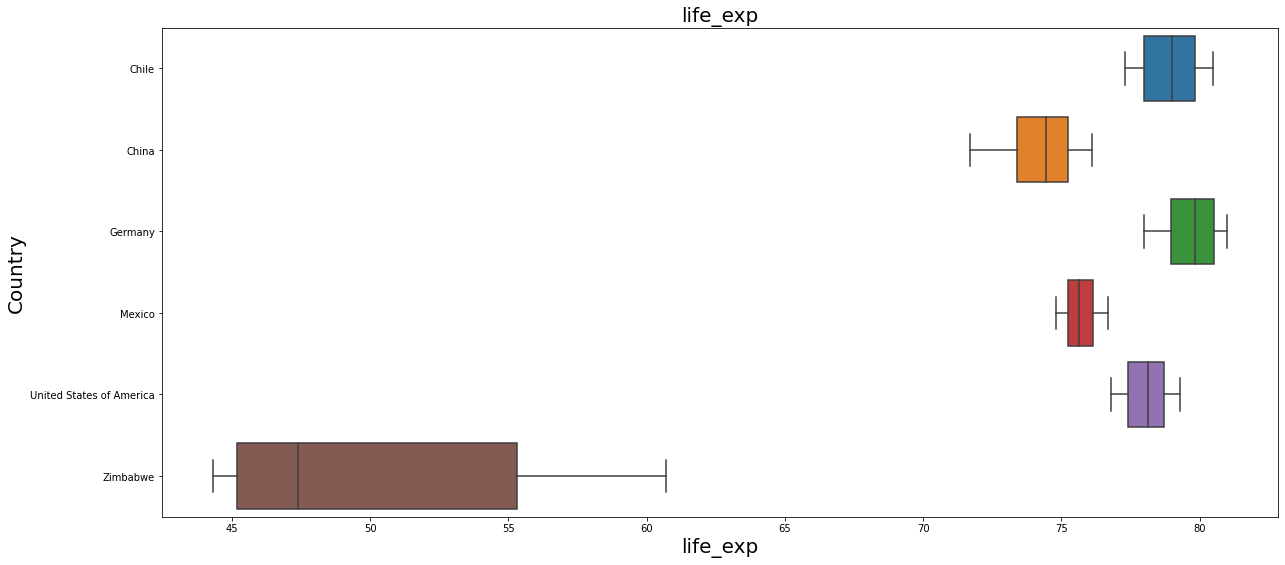

<Figure size 432x288 with 0 Axes>

In [172]:
plt.figure(figsize=(20, 9))
plt.title('life_exp', size=20)
plt.xlabel('life_exp', size=20)
plt.ylabel('Country', size=20)
sns.boxplot(x = 'life_exp', y = 'Country', data = df)
plt.show()
plt.clf()

Zimbabwe clearly has a much lower median life expectancy than the others, with a much large standard deviation as well as maximum and minimum values. Germany has the highest mean life expectancy. Suprisingly, Mexico's life expectancy has the lowest spread of all the countries. 

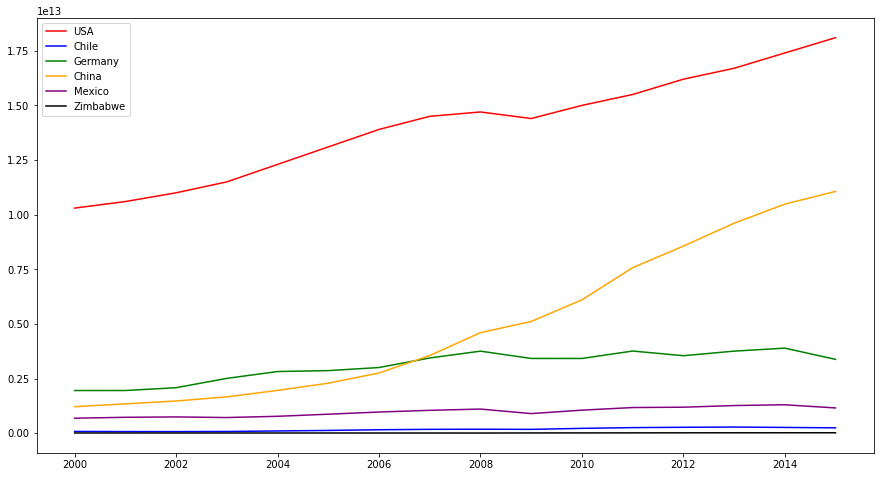

<Figure size 432x288 with 0 Axes>

In [173]:
usa = df[df['Country'] == 'United States of America']
chile = df[df['Country'] == 'Chile']
china = df[df['Country'] == 'China']
germany = df[df['Country'] == 'Germany']
mexico = df[df['Country'] == 'Mexico']
zimbabwe = df[df['Country'] == 'Zimbabwe']
plt.figure(figsize=(15, 8))
plt.plot(usa['Year'], usa['GDP'], color = 'r')
plt.plot(chile['Year'], chile['GDP'], color='b')
plt.plot(germany['Year'], germany['GDP'], color ='g')
plt.plot(china['Year'], china['GDP'], color='orange')
plt.plot(mexico['Year'], mexico['GDP'], color='purple')
plt.plot(zimbabwe['Year'], zimbabwe['GDP'], color='black')
countries = ['USA', 'Chile', 'Germany', 'China', 'Mexico', 'Zimbabwe']
plt.legend(['USA', 'Chile', 'Germany', 'China', 'Mexico', 'Zimbabwe'], loc='upper left')
plt.show()
plt.clf()



While Zimababwe, Mexico and Germany have had stagnant GDP growth in the period 2000-2015, China and the USA have increased at a fast rate, especially after 2010. 

Let's look at the association between life expectancy and GDP, with a positive threshold of 0.05. This means the likelihood of a type I error is 5 percent. 

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_exp, dtype: float64


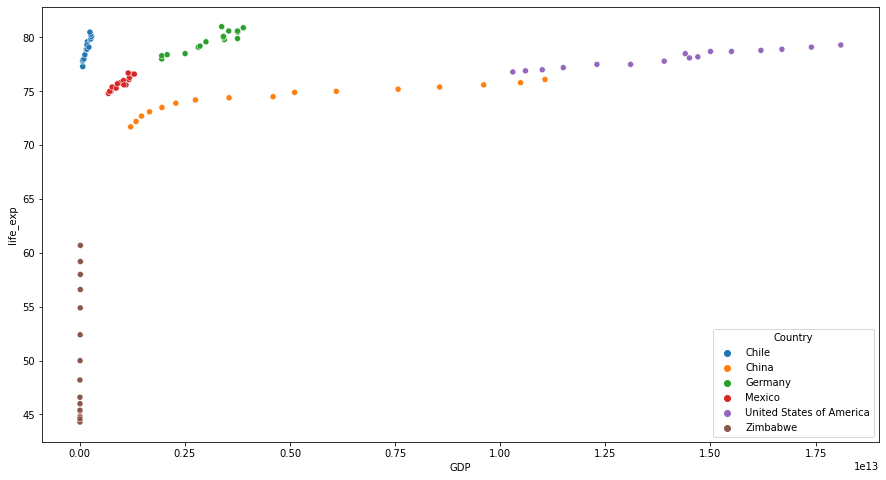

In [210]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'GDP', y = 'life_exp', data = df, hue = 'Country')
plt.ylim())
mean_life_exp = df.groupby('Country')['life_exp'].mean()
print(mean_life_exp)






From the data, we can see that as a country's GDP has grown, there life

In [149]:
#Let's see a bar plot with mean life expectancy by country

                          life_exp
Country                           
Germany                   79.65625
Chile                     78.94375
United States of America  78.06250
Mexico                    75.71875
China                     74.26250
Zimbabwe                  50.09375


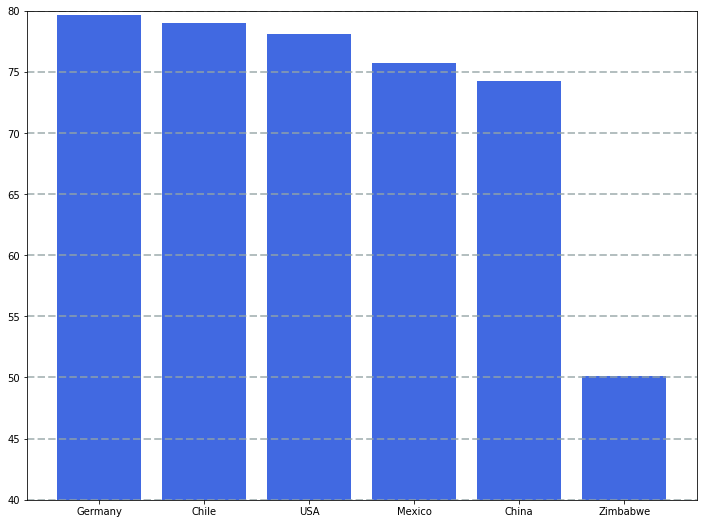

In [207]:
country_life_exp = df.groupby('Country').agg({'life_exp': 'mean'})
country_life_exp = country_life_exp.sort_values('life_exp',ascending=False)
countries = ['Germany', 'Chile', 'USA', 'Mexico', 'China', 'Zimbabwe']
fig, ax = plt.subplots(figsize=(12, 9))
plt.bar(range(len(country_life_exp)), country_life_exp.life_exp, color='royalblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylim(40, 80)
ax.set_xticks(range(len(country_life_exp)))
ax.set_xticklabels(countries)
print(country_life_exp)